In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import librosa as lr

from pathlib import PurePath
from IPython import display
from tqdm import tqdm

import vxs
import vxs.utils as vxsu

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



In [2]:
LVT_DIR = '../data/ramires-lvt/Dataset&Eval/DataSet - Wav + Annotation'
lvt_sets = {}
for rtype in [1, 2, 3]:
    frase = vxs.LVTTrackSet(LVT_DIR, subtype='Frase', recording_type=rtype, anno_type='csv')
    improvise = vxs.LVTTrackSet(LVT_DIR, subtype='Improviso', recording_type=rtype, anno_type='csv')
    lvt_sets[rtype] = frase, improvise

In [3]:
track, anno = lvt_sets[2][0].get(4)

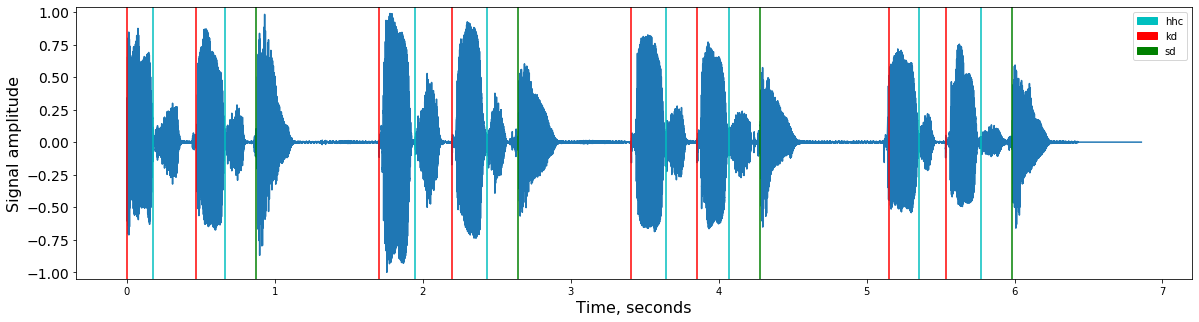

In [4]:
vxsu.plot_track(track, onsets=anno, color_events=True)

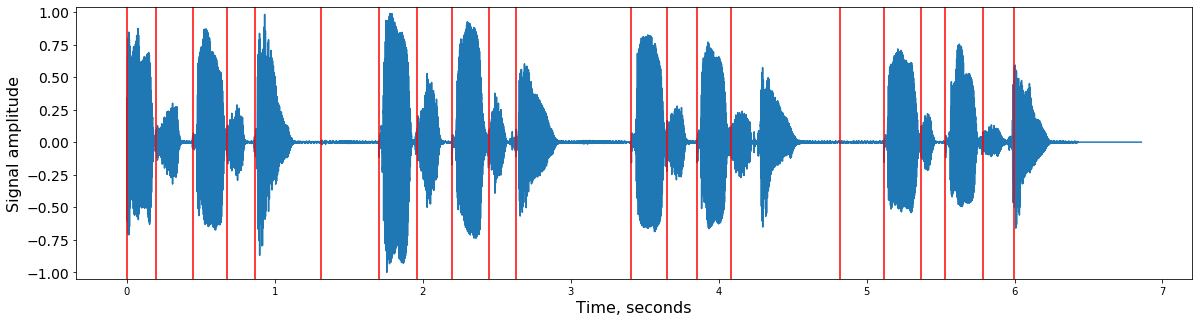

In [5]:
onsets = vxs.detect_onsets(track, method='complex')
vxsu.plot_track(track, onsets=onsets)

In [6]:
vxsu.play_audio(track)

/home/flyingleafe/vxs-vpt/pythonenv/lib/python3.6/site-packages/IPython/lib/display.py:173: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



In [19]:
def track_to_5_drums_ds(track, anno):
    ds = vxs.track_to_sample_set(track, anno)
    all_idxs = np.array([], dtype=int)
    clss = ['kd', 'sd', 'hhc']
    
    for cl in clss:
        cls_idx = np.arange(len(ds))[ds.classes == cl]
        if len(cls_idx) < 4:
            return None
        all_idxs = np.concatenate((all_idxs, cls_idx[:5]))
    return ds[all_idxs]

def mk_individual_datasets(trackset):
    individual_datasets = {}
    for track, anno in trackset.annotated_tracks():
        name = PurePath(track.filepath).stem[:-2]
        ds = track_to_5_drums_ds(track, anno)
        if ds is not None:
            individual_datasets[name] = ds
    return individual_datasets

def train_individual_classifiers(dss):
    individual_classifiers = {}
    for name, ds in tqdm(dss.items()):
        model = vxs.make_ramires_sfs(verbose=0)
        model.fit(ds.tracks, ds.classes)
        print(name, model.named_steps['classifier'].sfs.k_feature_idx_)
        individual_classifiers[name] = model
    return individual_classifiers

In [20]:
%%time
all_classifiers = {}
for rtype in [1, 2, 3]:
    print('rtype ' + str(rtype))
    improv = lvt_sets[rtype][1]
    dss = mk_individual_datasets(improv)
    all_classifiers[rtype] = train_individual_classifiers(dss)

rtype 1


  8%|▊         | 1/13 [00:41<08:13, 41.10s/it]

Nor (14,)


 15%|█▌        | 2/13 [01:24<07:40, 41.84s/it]

Maf (0, 4, 5, 8, 10, 11, 12, 13, 19, 20, 21, 22, 23, 24, 28, 40, 42, 48)


 23%|██▎       | 3/13 [02:05<06:54, 41.47s/it]

Rob (22,)


 31%|███       | 4/13 [02:45<06:09, 41.07s/it]

AFR (0, 4, 5, 7, 8, 10, 11, 12, 13, 16, 17, 20, 34, 36)


 38%|███▊      | 5/13 [03:28<05:34, 41.77s/it]

Mar (15,)


 46%|████▌     | 6/13 [04:11<04:54, 42.05s/it]

Bic (15,)


 54%|█████▍    | 7/13 [04:52<04:10, 41.69s/it]

Zga (19, 41, 43)


 62%|██████▏   | 8/13 [05:35<03:30, 42.10s/it]

Isa (26, 37)


 69%|██████▉   | 9/13 [06:15<02:46, 41.51s/it]

AZi (24,)


 77%|███████▋  | 10/13 [06:55<02:02, 41.00s/it]

MCo (15,)


 85%|████████▍ | 11/13 [07:35<01:21, 40.74s/it]

JSi (18,)


 92%|█████████▏| 12/13 [08:18<00:41, 41.41s/it]

Cra (0,)


100%|██████████| 13/13 [08:56<00:00, 41.25s/it]

Cat (15,)
rtype 2



  8%|▊         | 1/13 [00:40<08:02, 40.20s/it]

Nor (9,)


 15%|█▌        | 2/13 [01:23<07:31, 41.08s/it]

Maf (16, 17, 18)


 23%|██▎       | 3/13 [02:03<06:47, 40.77s/it]

Rob (26,)


 31%|███       | 4/13 [02:43<06:05, 40.61s/it]

AFR (22, 31)


 38%|███▊      | 5/13 [03:26<05:30, 41.33s/it]

Mar (2,)


 46%|████▌     | 6/13 [04:09<04:53, 41.92s/it]

Bic (2, 3)


 54%|█████▍    | 7/13 [04:50<04:09, 41.58s/it]

Zga (1, 16)


 62%|██████▏   | 8/13 [05:33<03:30, 42.09s/it]

Isa (2,)


 69%|██████▉   | 9/13 [06:14<02:46, 41.55s/it]

AZi (0, 1, 4, 5, 7, 8, 10, 11, 12, 13, 14, 34)


 77%|███████▋  | 10/13 [06:54<02:03, 41.18s/it]

MCo (2,)


 85%|████████▍ | 11/13 [07:34<01:21, 40.86s/it]

JSi (13,)


 92%|█████████▏| 12/13 [08:18<00:41, 41.63s/it]

Cra (1,)


100%|██████████| 13/13 [08:55<00:00, 41.19s/it]

Cat (22, 50)
rtype 3



  8%|▊         | 1/13 [00:40<08:09, 40.81s/it]

Nor (25, 50)


 15%|█▌        | 2/13 [01:23<07:36, 41.48s/it]

Maf (36,)


 23%|██▎       | 3/13 [02:03<06:50, 41.07s/it]

Rob (15,)


 31%|███       | 4/13 [02:44<06:07, 40.81s/it]

AFR (29, 30)


 38%|███▊      | 5/13 [03:27<05:31, 41.47s/it]

Mar (2, 3)


 46%|████▌     | 6/13 [04:10<04:53, 41.94s/it]

Bic (1,)


 54%|█████▍    | 7/13 [04:50<04:08, 41.42s/it]

Zga (0, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 34, 38)


 62%|██████▏   | 8/13 [05:33<03:30, 42.05s/it]

Isa (1,)


 69%|██████▉   | 9/13 [06:14<02:46, 41.50s/it]

AZi (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53)


 77%|███████▋  | 10/13 [06:54<02:03, 41.06s/it]

MCo (2,)


 85%|████████▍ | 11/13 [07:34<01:21, 40.85s/it]

JSi (1,)


 92%|█████████▏| 12/13 [08:18<00:41, 41.66s/it]

Cra (34,)


100%|██████████| 13/13 [08:55<00:00, 41.18s/it]

Cat (1,)
CPU times: user 27min 8s, sys: 28.7 s, total: 27min 37s
Wall time: 26min 51s


In [22]:
import pickle
all_features = {
    rtype: {name: model.named_steps['classifier'].sfs.k_feature_idx_ for name, model in all_classifiers[rtype].items()}
    for rtype in [1,2,3]
}

In [23]:
with open('../data_temp/ramires_features_idxs.pt', 'wb') as f:
    pickle.dump(all_features, f)

In [24]:
frase_tracks = {}
for rtype in [1, 2, 3]:
    frase_tracks[rtype] = {}
    for track, anno in lvt_sets[rtype][0].annotated_tracks():
        name = PurePath(track.filepath).stem[:-2]
        frase_tracks[rtype][name] = track, anno

In [27]:
cfs = {}
ms_thr = 50.0
for rtype in [1, 2, 3]:
    print(f'rtype {rtype}')
    total_cf = None

    for name, classifier in tqdm(all_classifiers[rtype].items()):
        track, anno = frase_tracks[rtype][name]
        result = vxs.segment_classify(track, classifier)#, onset_method='hfc', buf_size=512, hop_size=128)

        #onsets_f1, onsets_prec, onsets_rec = vxs.onsets_F1_score(
        #    result['onsets']['time'].values, anno['time'].values, ms_threshold=ms_thr, prec_rec=True)
        
        cf = vxs.classes_conf_matrix(result['onsets'], anno, ms_threshold=ms_thr)
        
        if total_cf is None:
            total_cf = cf
        else:
            total_cf = total_cf.add(cf, fill_value=0)
    
    cfs[rtype] = total_cf
    display.display(total_cf)
    display.display(vxs.cf_to_prec_rec_F1(total_cf))

  0%|          | 0/13 [00:00<?, ?it/s]

rtype 1


100%|██████████| 13/13 [00:08<00:00,  1.52it/s]


,hhc,kd,sd,sil
hhc,9,2,2,91
kd,2,15,3,84
sd,5,1,5,41
sil,1,0,0,0


,prec,rec,F1
hhc,0.529412,0.0865385,0.14876
kd,0.833333,0.144231,0.245902
sd,0.5,0.0961538,0.16129
total,0.644444,0.111538,0.190164


  0%|          | 0/13 [00:00<?, ?it/s]

rtype 2


100%|██████████| 13/13 [00:15<00:00,  1.16s/it]


,hhc,kd,sd,sil
hhc,85,7,11,1
kd,7,86,11,0
sd,7,6,37,2
sil,34,47,7,0


,prec,rec,F1
hhc,0.639098,0.817308,0.7173
kd,0.589041,0.826923,0.688
sd,0.560606,0.711538,0.627119
total,0.602899,0.8,0.687603


  0%|          | 0/13 [00:00<?, ?it/s]

rtype 3


100%|██████████| 13/13 [00:13<00:00,  1.02s/it]


,hhc,kd,sd,sil
hhc,65,8,26,5
kd,9,73,4,18
sd,4,11,30,7
sil,9,20,7,0


,prec,rec,F1
hhc,0.747126,0.625,0.680628
kd,0.651786,0.701923,0.675926
sd,0.447761,0.576923,0.504202
total,0.631579,0.646154,0.638783


In [130]:
lang_model = vxs.load_model_from_bundle('../data/drum_kit_rnn.mag', hho_included=False)

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /tmp/tmp0ctl7rfo/model_drum_kit.ckpt


/home/flyingleafe/vxs-vpt/pythonenv/lib/python3.6/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



In [140]:
ms_thr = 50.0
for rtype in [1, 2, 3]:
    print(f'rtype {rtype}')
    total_cf = None

    for name, classifier in tqdm(all_classifiers[rtype].items()):
        track, anno = frase_tracks[rtype][name]
        result = vxs.segment_classify(track, classifier, lang_model=lang_model,
                                      bpm=140.0, class_order=['kd', 'sd', 'hhc'])
        
        onsets_f1, onsets_prec, onsets_rec = vxs.onsets_F1_score(
            result['onsets']['time'].values, anno['time'].values, ms_threshold=ms_thr, prec_rec=True)
        
        cf = vxs.classes_conf_matrix(result['onsets'], anno, ms_threshold=ms_thr)
        
        if total_cf is None:
            total_cf = cf
        else:
            total_cf = total_cf.add(cf, fill_value=0)
    
    cfs[rtype] = total_cf
    display.display(total_cf)
    display.display(vxs.cf_to_prec_rec_F1(total_cf))

  0%|          | 0/13 [00:00<?, ?it/s]

rtype 1


100%|██████████| 13/13 [00:05<00:00,  2.26it/s]


,hhc,kd,sd,sil
hhc,27,4,6,67
kd,5,14,5,80
sd,0,5,6,41
sil,2,4,0,0


,prec,rec,F1
hhc,0.794118,0.259615,0.391304
kd,0.518519,0.134615,0.21374
sd,0.352941,0.115385,0.173913


  0%|          | 0/13 [00:00<?, ?it/s]

rtype 2


100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


,hhc,kd,sd,sil
hhc,87,1,14,2
kd,3,89,10,2
sd,0,19,29,4
sil,27,29,36,0


,prec,rec,F1
hhc,0.74359,0.836538,0.78733
kd,0.644928,0.855769,0.735537
sd,0.325843,0.557692,0.411348


  0%|          | 0/13 [00:00<?, ?it/s]

rtype 3


100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


,hhc,kd,sd,sil
hhc,78,12,11,3
kd,8,74,6,16
sd,7,3,36,6
sil,16,16,8,0


,prec,rec,F1
hhc,0.715596,0.75,0.732394
kd,0.704762,0.711538,0.708134
sd,0.590164,0.692308,0.637168
